# 검색
- 저장되어 있는 자료 중에서 원하는 항목을 찾는 작업
- 목적하는 탐색 키를 가진 항목을 찾는 것
  - 탐색 키(Search key) : 자료를 구별하여 인식할 수 있는 키
- 검색의 종류
  - 순차 검색, 이진 검색, 해쉬


# 순차 검색(Sequential Search)
- **일열로 되어 있는 자료를 순서대로 검색하는 방법**
  - 가장 간단하고 직관적인 검색 방법
  - 배열이나 연결 리스트 등 순차구조로 구현된 자료구조에서 원하는 항목을 찾을 때 유용함
  - 알고리즘이 단순하여 구현이 쉽지만, 검색 대상의 수가 많은 경우에는 수행시간이 급격히 증가하여 비효율적임
  - 정렬되어 있지 않은 경우와 정렬되어 있는 경우로 나뉨
- **검색 과정**
  - 첫번째 원소부터 순서대로 검색 대상(가지고있는 값)과 키 값(찾으려는 값)이 같은 원소가 있는지 비교하며 찾는다.
  - 키 값이 동일한 원소를 찾으면 그 원소의 인덱스를 반환한다.
  - 자료 구조의 마지막에 이를 때까지 검색 대상을 찾지 못하면 검색 실패
  - 기본적으로 모든 원소에 접근 가능해야 함
    - ```python
      def func(key, A)
        for i in range(0,N) :
          if key = A[i] :   
            return i    #key의 인덱스 반환
        return -1       #key를 찾지 못했을 때 반환할 값
      ```
</br>



- **정렬되지 않은 경우**
  - 찾고자 하는 원소의 순서에 따라 비교 횟수가 결정됨
    - 첫 번째 원소를 찾을 때는 1번 비교, 두 번째 원소를 찾을 때는 2번 비교
    - 정렬되지 않은 자료에서의 순차 검색의 평균 횟수
      - =(1/n)*(1+2+3+...+n)=(n+1)/2
    - 시간 복잡도 : O(n)
    - 구현 예

      ```python
          def sequential_search(a,n,key)
          i = 0
          while i<n and a[i] != key:   #i == n으로 배열이 끝나거나 key를 찾으면 종료
            i = i+1
            if a[i] == key :
              return i
          if i == n : return -1            #배열 끝까지 가도 못 찾았을 때
          else : return -1              #키가 없을 때 
      ```

      
  </br>

  - **정렬된 경우**
    - 자료가 오름차순으로 정렬된 상태에서 검색을 실시한다고 가정했을 때
    - 자료를 순차적으로 검색하면서 키 값을 비교하여, 원소의 키 값이 검색 대상의 키 값보다 크면 찾는 원소가 없다는 것이므로(정렬되어있기 때문에) 더 이상 검색하지 않고(그 뒤를 보지 않고) 검색을 종료한다.
    - 찾고자 하는 원소의 순서에 따라 비교횟수가 결정됨
      - 정렬이 되어있으므로, 검색 실패를 반환하는 경우 평균 비교 횟수가 반으로 줄어든다
      - 시간 복잡도 : O(n)
      - 구현 예1
        ```python
          for i in range(0,N):
            if a[i] == key :
              return i
            elif a[i] > key :     #큰 값이 나왔을 때 멈추는 조건!
              return -1       #key보다 큰 값이 있다는 건 key가 없다는 것!
          return -1         #배열 끝까지 갔는데(for문을 모두 돌았는데)도 key가 없는 경우
          ```

      - 구현 예2
        ```python
          def sequentialSearch2(a,n,key) :
            i = 0                     #단축평가 : 앞이 F면 뒤를 안봄!!!
            while i<n and a[i]<key :   #※a[i]<key를 먼저 제시하면 단축평가 때문에 에러가 뜸(out of range)
              i = i+1
            if i < n and a[i] == key :
              return i
            else :
              return -1




# 이진 검색(Binary Search)
  - 자료의 가운데에 있는 항목의 키 값과 비교하여 다음 검색의 위치를 결정하고 검색을 계속 진행하는 방법
    - 목적 키를 찾을 때까지 이진 검색을 순환적으로 반복 수행함으로써 검색 범위를 반으로 줄여가면서 보다 빠르게 검색을 수행함
  - 이진 검색을 하기 위해서는 자료가 **정렬된 상태**여야 한다 (정렬된 상태에서는 순차 검색보다 이진 검색을 우선 사용함)
  - 장점 : 상대적으로 속도가 빠르다 / 단점 : 삽입 삭제가 어렵고 정렬에 시간이 필요하다
  - ![이진검색 예시.PNG](<attachment:이진검색 예시.PNG>)
  - ![이진검색 검색실패예시.PNG](<attachment:이진검색 검색실패예시.PNG>)
    - ```python
        while 남은 구간이 없을 때까지 :  #하나라도 남아있으면 확인해야 함
          mid = (start+end)//2
          if a[mid] == key :
            return mid
          elif a[mid] <key :    #오른쪽 범위 탐색
            start = mid + 1
          else :                #왼쪽 범위 탐색해야할 때
            end = mid -1
      ```
  - 구현
    - 검색 범위의 시작점과 종료점을 이용하여 검색을 반복 수행한다.
    - 이진 검색의 경우 자료에 삽입이나 삭제가 발생했을 때 배열의 상태를 항상 정렬 상태로 유지하는 추가 작업이 필요하다
    - ```python
        def binarySearch(a,N,key) :
          start = 0   # 시작 원소 인덱스
          end = N-1   # 마지막 원소 인덱스
          while start <= end:   # 시작점과 끝지점 사이를 탐색, start == end (마지막 하나도 확인) #start와 end가 뒤바뀐 경우 중단!
            middle = (start+end)//2
            if a[middle] == key :     # 검색 성공
              return true
            elif a[middle] > key :    # key는 왼쪽에 있단 뜻! 왼쪽 탐색해야하니 end # 끝 위치를 기준 위치에서 왼쪽으로 바꿈
              end = middle -1
            else :
              start = middle +1       # 오른쪽 탐색 #시작 지점을 기준 위치에서 오른쪽으로 바꿈
          return false
      ```
    
    </br>

    - 재귀 함수 이용 : 나중에 자세히
    

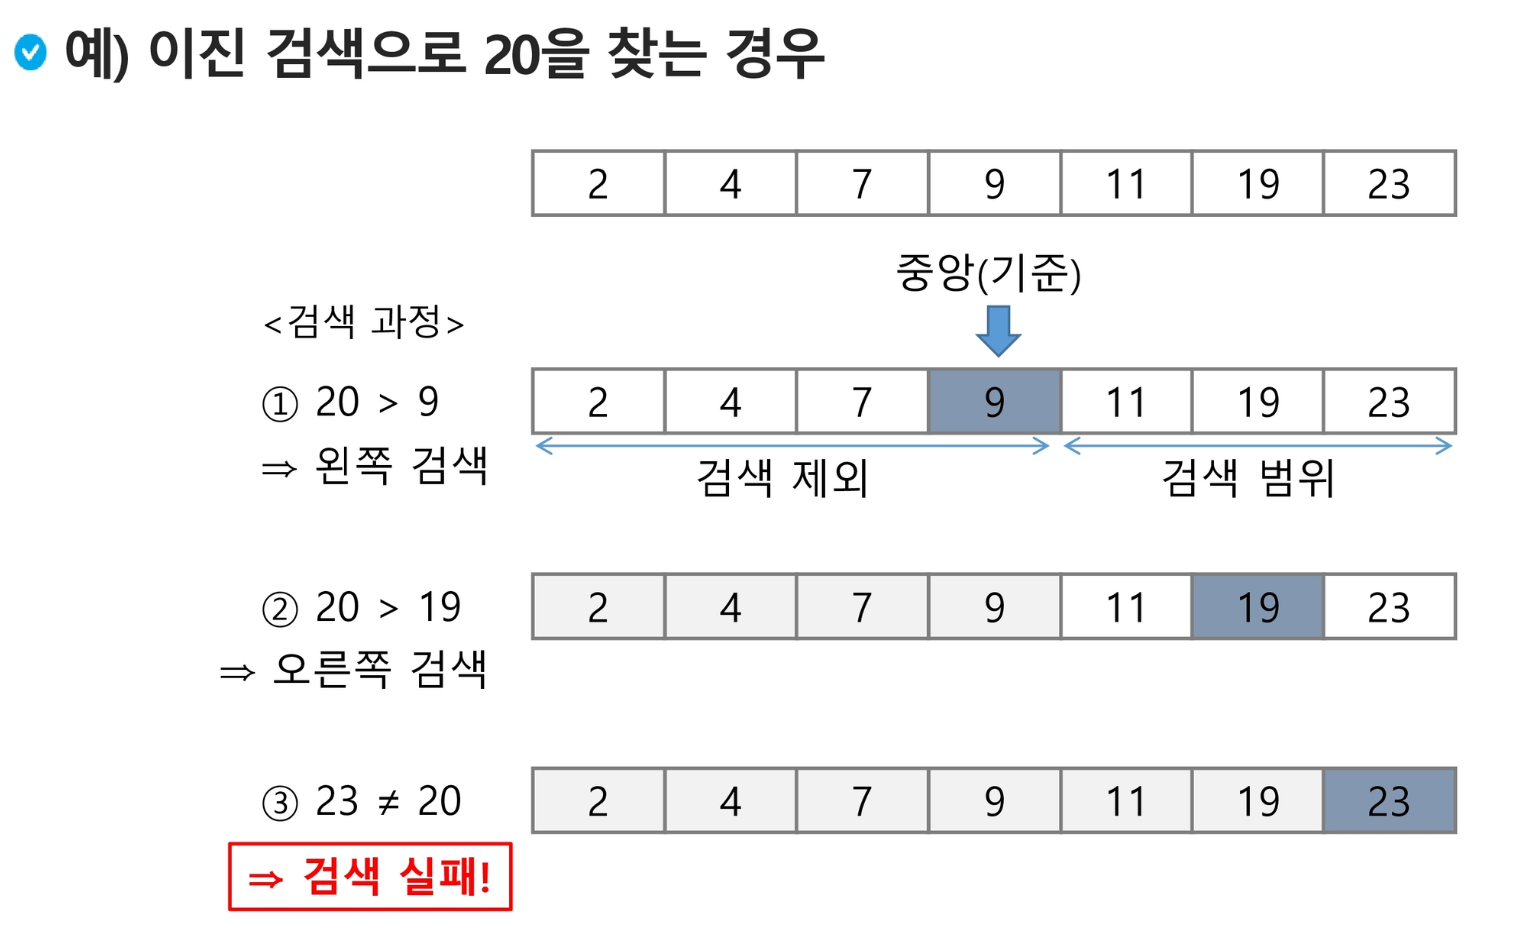
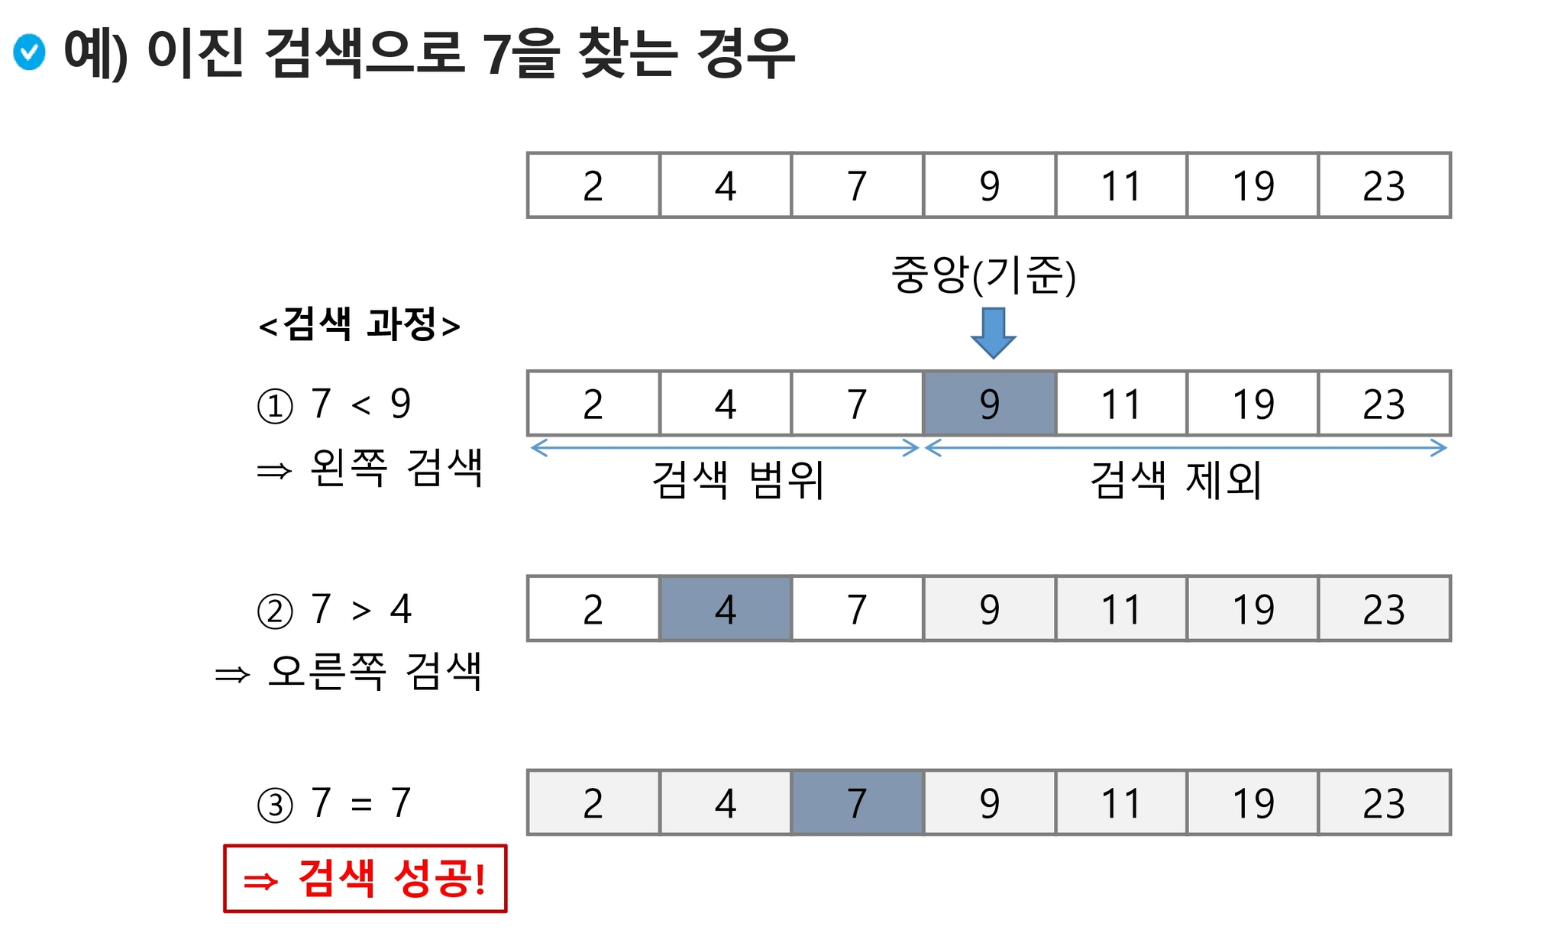

# 인덱스
- 원본 데이터에 데이터가 삽입될 경우 상대적으로 크기가 작은 인덱스 배열을 정렬하기 때문에 속도가 빠름
- 인덱스라는 용어는 Database에서 유래했으며, 테이블에 대한 동작 속도를 높여주는 자료 구조를 일컫는다.
- database 분야가 아닌 곳에서는 Look up table 등의 용어를 사용하기도 한다.
- 인덱스를 저장하는데 필요한 디스크 공간은 보통 테이블을 저장하는데 필요한 디스크 공간보다 작다. 왜냐하면 보통 인덱스는 키-필드만 갖고 있고,  테이블의 다른 세부 항목들은 갖고 있지 않기 때문이다.
- 인덱스
  - 대량의 데이터를 매번 정렬하면, 프로그램의 반응은 느려질 수 밖에 없다.
  - 이러한 대량 데이터의 성능 저하 문제를 해결하기 위해 배열 인덱스를 사용할 수 있다.
  - 데이터베이스 인덱스는 이진 탐색 트리 구조로 되어있다. (삽입, 삭제, 정렬이 한번에 빠르게 이루어지고, 이진 검색 방법을 사용하기 때문에 검색이 빠름)
  

# 선택 정렬(Selection Sort)
- 주어진 자료들 중 가장 작은 값의 원소부터 차례대로 선택하여 위치를 교환하는 방식
  - 앞서 살펴본 셀렉션 알고리즘을 전체 자료에 적용한 것이다.
- 정렬 과정(오름차순)
  1. 주어진 리스트 중에서 최솟값을 찾는다.
  2. 그 값을 리스트의 맨 앞에 위치한 값과 교환한다.
  3. 맨 처음 위치를 제외한 나머지 리스트를 대상으로 위의 과정을 반복한다.
  4. 미정렬 원소가 하나 남은 상황에서는 마지막 원소가 가장 큰 값을 갖게 되므로, 실행을 종료하고 선택 정렬이 완료된다.
- 시간 복잡도 : O(n²)
- 알고리즘
  - ```python
      def SelectionSort(a[],n) :
        for i in range(0, n-1) :  #0부터 n-2까지 탐색(원소가 두개 남았을 때까지)
          min_idx = i   #기준위치(구간 시작) #0으로 하면 매번 초기화되므로 주의 #현재 구간의 맨 앞을 최소로 가정
          #비교 구간 원소(이 구간 안에서 최소값을 찾아야 함) #최솟값을 맨앞에 배치하니 그 다음 구간을 탐색(i+1)
          for j in range(i+1, N) :  
            if a[min_idx] < a[j] :
              min_idx = j
          a[i], a[min_idx] = a[min_idx],a[i]    #자리 교환
    ```

In [10]:
def selection_sort(arr, N) : #arr : 정렬 대상, N 크기
    # 주어진 구간에 대해 기준위치 i를 정하기(구간의 맨 처음), 원소가 두개 남을 때까지(N-2)
    for i in range(N-1) :       #arr 안의 인덱스 범위
        min_index = i           #최소값 위치를 기준 위치로 가정
        for j in range(i+1, len(arr)):  #남은 원소에 대해 실제 최소값의 위치 검색(실제 최소값의 위치 : j), 구간의 끝까지 감
            if arr[min_index] > arr[j] :
              min_index = j             #최소값을 j로 바꿈
        arr[i], arr[min_index] = arr[min_index], arr[i]     #기준위치 i와 최소값의 위치를 교환함!



A = [2,7,5,3,4]
B = [4,3,2,1]
selection_sort(A,len(A))        #함수를 사용해 정렬된 A
selection_sort(B,len(B))        #함수를 사용해 정렬된 B
print(A)
print(B)

[2, 3, 4, 5, 7]
[1, 2, 3, 4]


# 셀렉션 알고리즘(Selection Algorithm)
- 저장되어 있는 자료로부터 k번째로 큰 혹은 작은 원소를 찾는 방법을 셀렉션 알고리즘이라 한다.
  - 최소값, 최대값 혹은 중간값을 찾는 알고리즘을 의미하기도 한다.
  - 선택 정렬이 전채를 비교하는 것이라면 셀렉션 알고리즘은 일부를 비교하는 것
- 선택 과정
  - 셀렉션은 아래와 같은 과정을 통해 이루어진다.
    - 정렬 알고리즘을 이용하여 자료 정렬하기
    - 원하는 순서에 있는 원소 가져오기
- k번째로 작은 원소를 찾는 알고리즘
  - 1번부터 k번째까지 작은 원소들을 찾아 배열의 앞쪽으로 이동시키고, 배열의 k번째를 반환한다.
  - k가 비교적 작을 때 유용하며  O(kn)의 수행 시간을 필요로 한다.
  - ```python
      def select(arr,k) :
        for i in range(0,k) :
          min_index = i
          for j in range(i+1, len(arr)):
            if arr[min_index] > arr[j] :
              min_index = j
          arr[i], arr[min_index] = arr[min_index], arr[i]
        return arr[k-1]
    ```



![정렬알고리즘 비교.PNG](<attachment:정렬알고리즘 비교.PNG>)
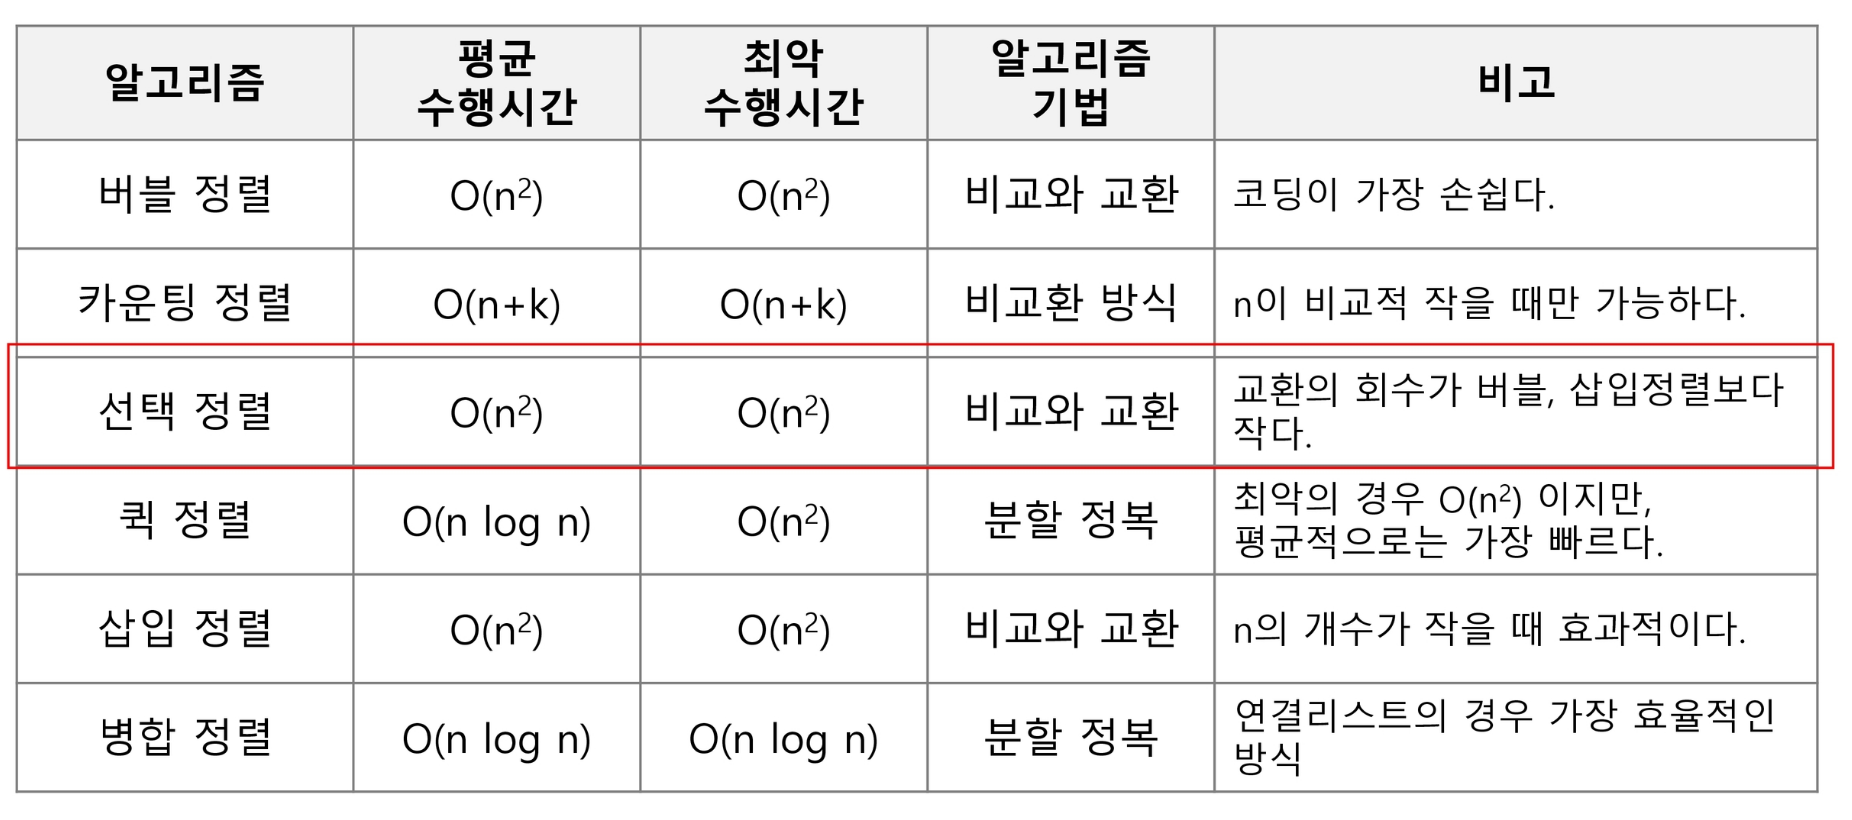